# New tasks:
- make a function that read a fasta file from disk and yields (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comment
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU
- yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUUCAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUacagugcCUU)

- make a function that receives in input the list of sequences, and yields structure graphs +
- make a function that receives a iterator over graphs and i,j and plots only graphs from num i to num j


1. test if space or tab
2. test if command (after a space or any latter exept 'aucg' or 'rnytkmswbdhvgu')
3. test if new line without header then concatenate
4. test if new line with header then new graph

In [112]:
%matplotlib inline
import os, sys
import subprocess as sp
from itertools import cycle
import networkx as nx
import re
from eden.util import display

class FastaToGraph(object):
    def __init__(self):
        pass
    
    def SequeceWrapper(self, path):
        #path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        seq = self._readFastaFile(path)
        seqs = self._removeCommands(seq)
        print ("path", path)
        return seqs
    
# read a fasta file separate the head and the sequence
#    def _readFastaFile(self, file_name):
    def _readFastaFile(self, path):
#        path = "/home/alsheikm/Work/EDeN_examples/fastaFiles/"
        head_start = '>'
        head = []
        seq = []
        seq1 = []
        string_seq =[]

        for file in os.listdir(path):
            #open file
            read_file = open(os.path.join( path, file),'r')
            
            #seperate the head and the sequence
            for line in read_file:
                lines = list(line)
                # the read line is the head of the sequence write it in head list
                if lines[0] == head_start:
                    head.append(line)
                    seq.append(string_seq)
                    seq1 = []
                    #print ("head", head)

                # the read line is a sequence writ it in a sequence list
                if lines[0] != head_start:
                    seq1.append(line)
                    string_seq= str(seq1)
                    print ("string_seq", string_seq)
            seq.append(string_seq)      
            print ('head', head)
            print ("seq", seq)
            
            return seq
    
    #read a line ignore string after the whitspace, tab and not (a,c,g,u)
    def _removeCommands(self, seq):
        seq_list = []
        not_added_string = []
        input_seqs = seq
        seqs = []
        
        #print ("string seq2:", seq)
        for seq in input_seqs:
            for i, letter in enumerate(seq):
                seq = str(seq)                  
                if letter == "A" or letter == "C" or letter == "G" or letter == "U":
            #    if letter == {'a','c','g','u'}:
                    letters = list(letter)
                    seq_list = seq_list + letters
                    #print ('new_seq:', seq_list)
                    #print '******'

                else:
                    if letter == " " or letter != "A" or letter != "C" or letter != "G" or letter != "U":
                        letters = list(letter)
                        not_added_string = not_added_string + letters
                        #print ('not_added:', not_added)
                        #print '-----'
        seqs.append(seq_list)
        print ("seqs",seqs)
                #print ("seq_remove:",seq)        
        print ('final not_added:', not_added_string)
        #print ('final seq_list:', seq_list)

        return seqs

#generate the graph for each read sequence
    def _makeFastaGraph(self, seq):
        G = nx.Graph()
        for j,sequence in enumerate(seq):
    #        print ('j', j)
            print ("sequence", sequence)
            sequences = list(sequence)
            for i,letter in enumerate(sequences):
                G.add_node(i, label = sequences[i])
                if i > 0:
                    G.add_edge(i-1, i, label = 'x')
            return G

# Experiment

In [113]:
#Read fasta files and separate sequences from the head of the sequence
fgraph = FastaToGraph()
path = "/home/alsheikm/Work/EDeN_examples/fasta/"
seqs = fgraph.SequeceWrapper(path)

('string_seq', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n']")
('string_seq', "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n', 'CCAGUGGGUCCA\\n']")
('string_seq', "['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU\\n']")
('string_seq', "['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU\\n', 'ACUUCUAAUGA\\n']")
('head', ['>AB003409.1/96-167\n', '>AB009835.1/1-71\n'])
('seq', [[], "['GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC comments\\n', 'CCAGUGGGUCCA\\n']", "['CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU\\n', 'ACUUCUAAUGA\\n']"])
('seqs', [['G', 'G', 'G', 'C', 'C', 'C', 'A', 'U', 'A', 'G', 'C', 'U', 'C', 'A', 'G', 'U', 'G', 'G', 'U', 'A', 'G', 'A', 'G', 'U', 'G', 'C', 'C', 'U', 'C', 'C', 'U', 'U', 'U', 'G', 'C', 'A', 'A', 'G', 'G', 'A', 'G', 'G', 'A', 'U', 'G', 'C', 'C', 'C', 'U', 'G', 'G', 'G', 'U', 'U', 'C', 'G', 'A', 'A', 'U', 'C', 'C', 'C', 'A', 'G', 'U', 'G', '

('sequence', 'G')


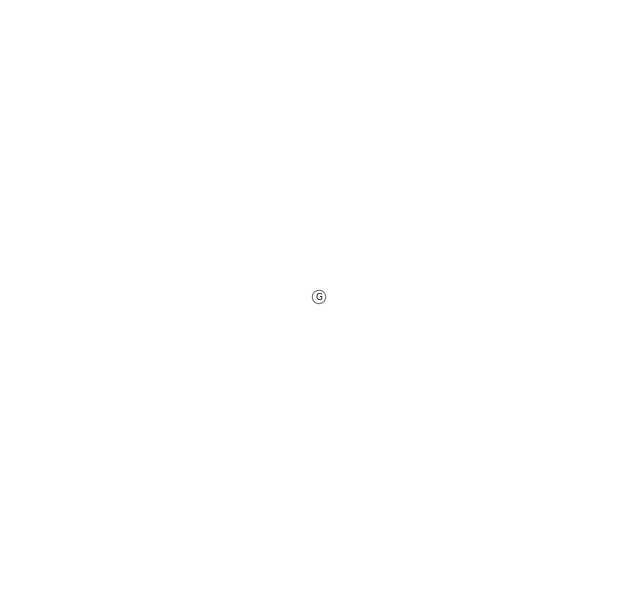

In [111]:
#generating the graph
for seq in seqs:
    G = fgraph._makeFastaGraph(seq)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')